## TIME SERIES ANALYSIS ON CORONAVIRUS FOR THE NETHERLANDS THROUGH DAILY UPDATED DATASET (LATEST VERSION - 07/IV)

In [0]:
import pandas as pd
import requests
import datetime
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#This part is for daily update the dataset.
today = datetime.now()
today = today.strftime('%Y-%m-%d')

yesterday = datetime.now() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')

try: 
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{today}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
    
except:    
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{yesterday}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
        
print('Dataset is ready.')

#Data Wrangling
df_domain.columns = ['Day','Month','Year','Cases','Deaths','Countries and territories','Geold','Country_Code','Population']

df_domain.drop('Day',1,inplace=True)
df_domain.drop('Month',1,inplace=True)
df_domain.drop('Year',1,inplace=True)
df_domain.drop('Countries and territories',1,inplace=True)
df_domain.drop('Country_Code',1,inplace=True)
df_domain.drop('Population',1,inplace=True)
df_domain = df_domain[df_domain['Geold'] == 'NL']
df_domain.drop('Geold',1,inplace=True)
df_domain.drop(df_domain.tail(1).index,inplace=True) # drop last row 31-12-2019
#df_domain.set_index(pd.DatetimeIndex(df_domain['dateRep']), inplace=True)
df_domain.loc[:, 'Case_Fatality_Ratio'] =df_domain['Deaths']/df_domain.Cases
df_NL=df_domain
df_NL.head(10)


Dataset is ready.


,Cases,Deaths,Case_Fatality_Ratio
dateRep,,,
2020-04-12,1316,132,0.100304
2020-04-11,1335,115,0.086142
2020-04-10,1213,148,0.122012
2020-04-09,969,147,0.151703
2020-04-08,777,234,0.301158
2020-04-07,952,101,0.106092
2020-04-06,1224,115,0.093954
2020-04-05,904,164,0.181416
2020-04-04,1026,148,0.144250


In [3]:
df_NL.tail(10)

,Cases,Deaths,Case_Fatality_Ratio
dateRep,,,
2020-01-10,0,0,NaN
2020-01-09,0,0,NaN
2020-01-08,0,0,NaN
2020-01-07,0,0,NaN
2020-01-06,0,0,NaN
2020-01-05,0,0,NaN
2020-01-04,0,0,NaN
2020-01-03,0,0,NaN
2020-01-02,0,0,NaN


In [4]:
type(df.index[0]) #Checking the dates whether they are timestamp or not.

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
df_NL.shape

(103, 3)

In [6]:
df_NL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 2020-04-12 to 2020-01-01
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cases                103 non-null    int64  
 1   Deaths               103 non-null    int64  
 2   Case_Fatality_Ratio  45 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 3.2 KB


In [7]:
df_NL.isnull().sum()

Cases                   0
Deaths                  0
Case_Fatality_Ratio    58
dtype: int64

In [8]:
df_NL.describe()

,Cases,Deaths,Case_Fatality_Ratio
count,103.000000,103.000000,45.000000
mean,237.019417,25.660194,0.066625
std,408.070159,52.302955,0.066435
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.056180
75%,285.000000,11.500000,0.100304
max,1335.000000,234.000000,0.301158


## General Trendline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8f07439e8>,
      dtype=object)

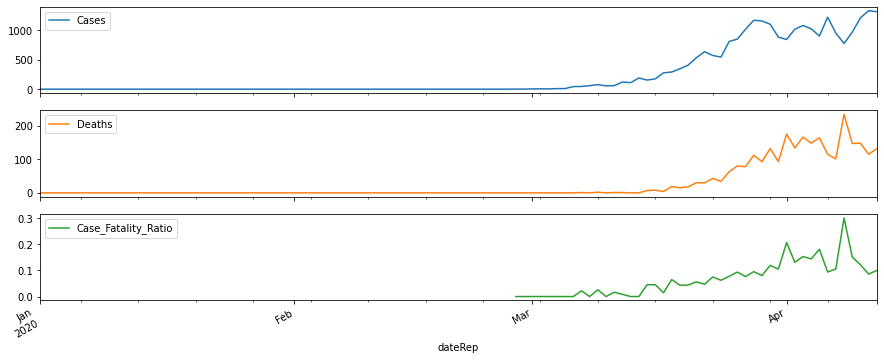

In [9]:
df_NL.plot(subplots=True, figsize=(15,6))

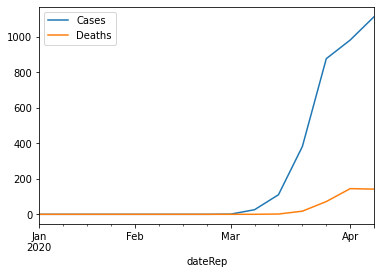

In [10]:
df_NL[['Cases','Deaths']].resample('W').mean().plot()

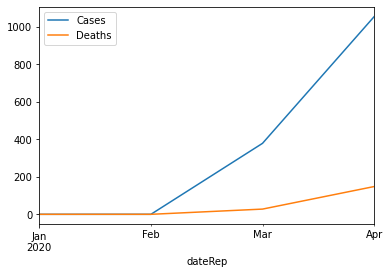

In [11]:
df_NL[['Cases','Deaths']].resample('M').mean().plot()

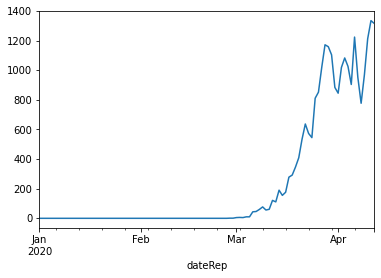

In [12]:
df_NL['Cases'].resample('D').mean().plot()

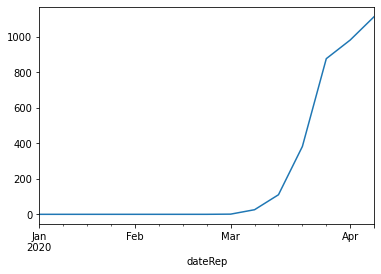

In [13]:
df_NL['Cases'].resample('W').mean().plot()

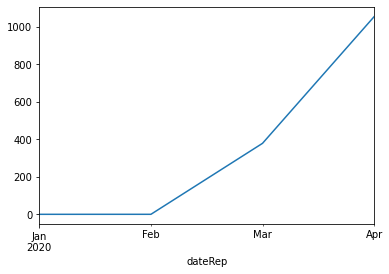

In [14]:
df_NL['Cases'].resample('M').mean().plot()

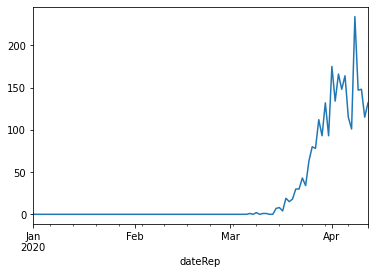

In [15]:
df_NL['Deaths'].resample('D').mean().plot()

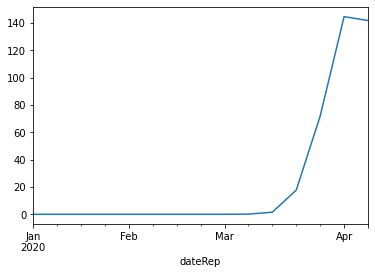

In [16]:
df_NL['Deaths'].resample('W').mean().plot()

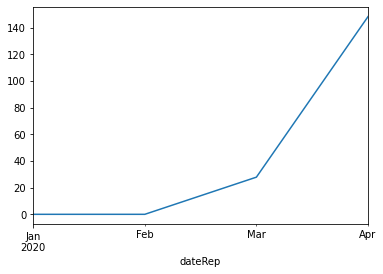

In [17]:
df_NL['Deaths'].resample('M').mean().plot()

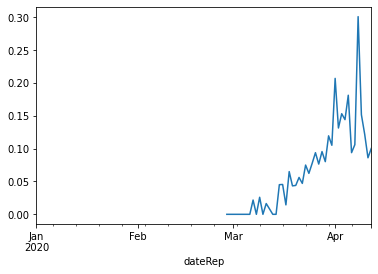

In [18]:
df_NL['Case_Fatality_Ratio'].resample('D').mean().plot()

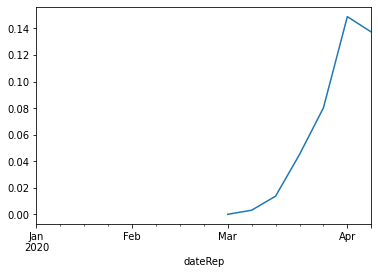

In [19]:
df_NL['Case_Fatality_Ratio'].resample('W').mean().plot()

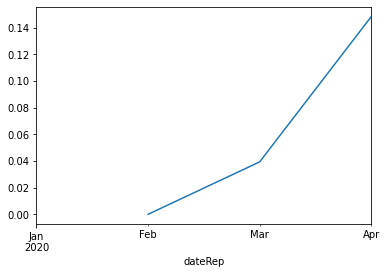

In [20]:
df_NL['Case_Fatality_Ratio'].resample('M').mean().plot()

## March Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8f05e3e80>,
      dtype=object)

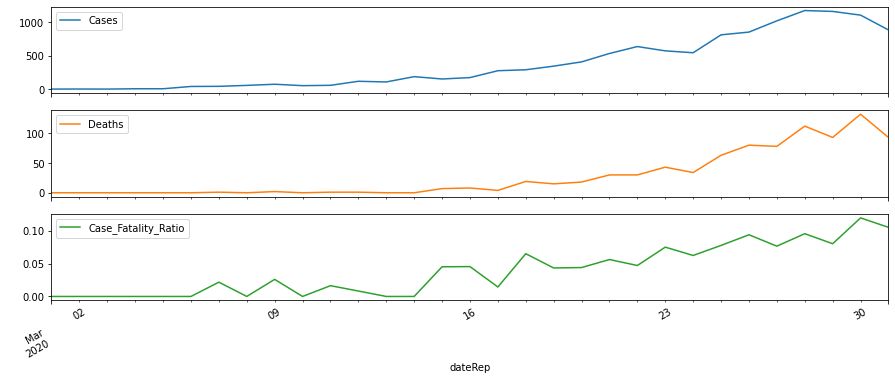

In [21]:
df_NL['2020-03'].plot(subplots=True, figsize=(15,6))

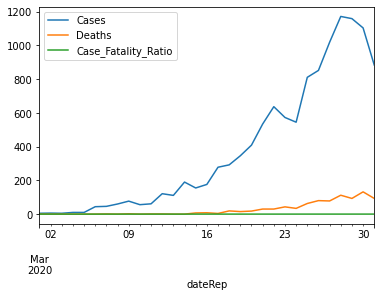

In [22]:
df_NL['2020-03'].resample('D').mean().plot()

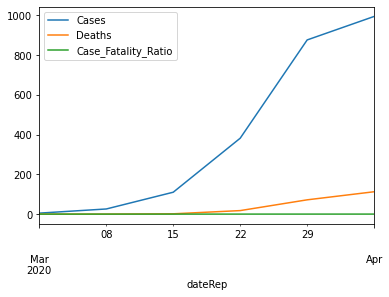

In [23]:
df_NL['2020-03'].resample('W').mean().plot()

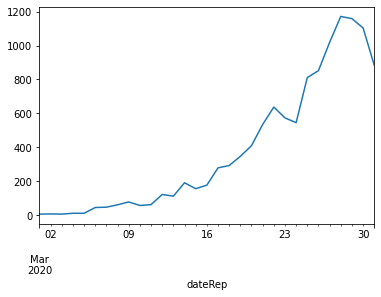

In [24]:
df_NL.Cases['2020-03'].resample('D').mean().plot()

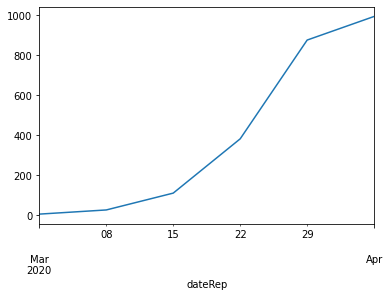

In [25]:
df_NL.Cases['2020-03'].resample('W').mean().plot()

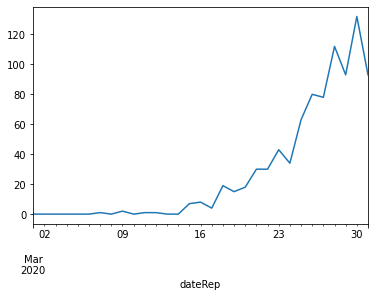

In [26]:
df_NL.Deaths['2020-03'].resample('D').mean().plot()

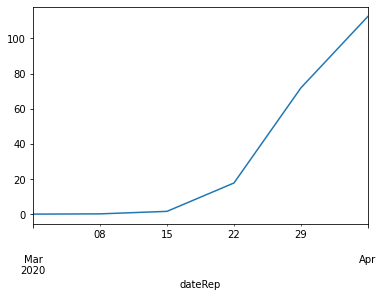

In [27]:
df_NL.Deaths['2020-03'].resample('W').mean().plot()

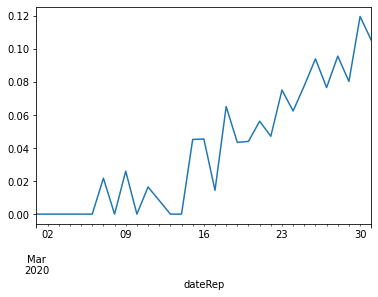

In [28]:
df_NL.Case_Fatality_Ratio['2020-03'].resample('D').mean().plot()

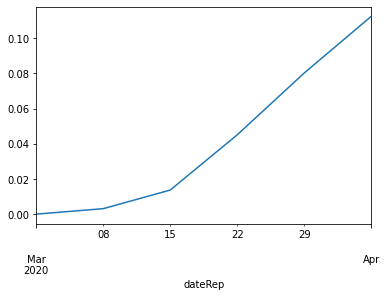

In [29]:
df_NL.Case_Fatality_Ratio['2020-03'].resample('W').mean().plot()

## April Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8f1dc7da0>,
      dtype=object)

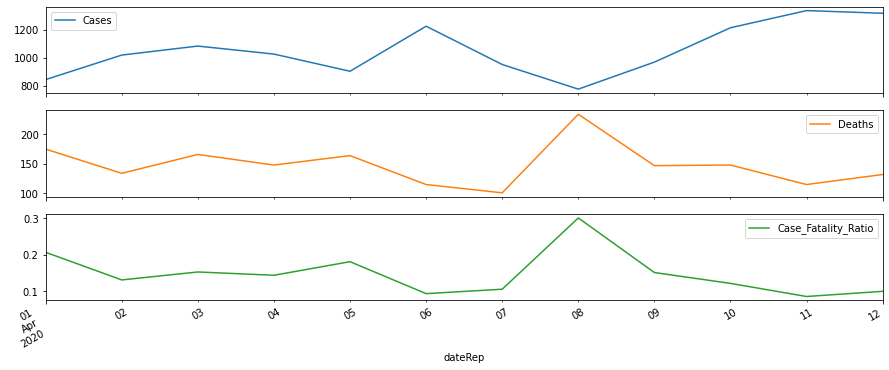

In [30]:
df_NL['2020-04'].plot(subplots=True, figsize=(15,6))

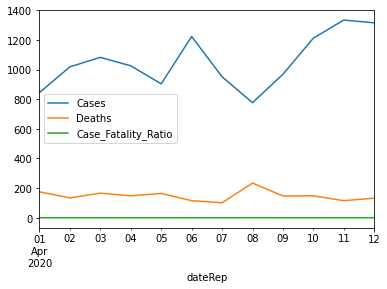

In [31]:
df_NL['2020-04'].resample('D').mean().plot()

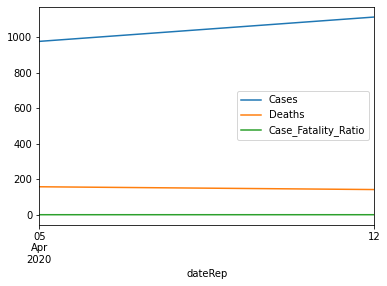

In [32]:
df_NL['2020-04'].resample('W').mean().plot()

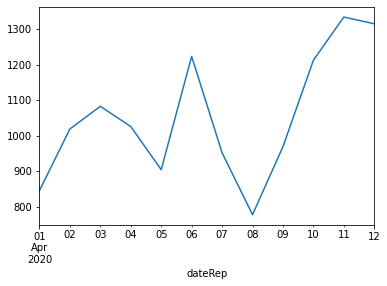

In [33]:
df_NL.Cases['2020-04'].resample('D').mean().plot()

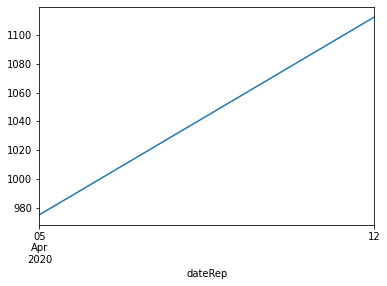

In [34]:
df_NL.Cases['2020-04'].resample('W').mean().plot()

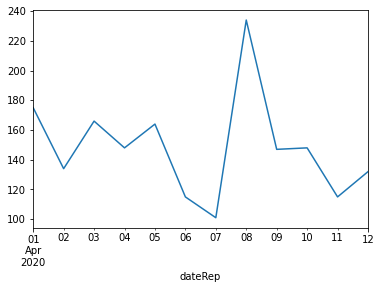

In [36]:
df_NL.Deaths['2020-04'].resample('D').mean().plot()

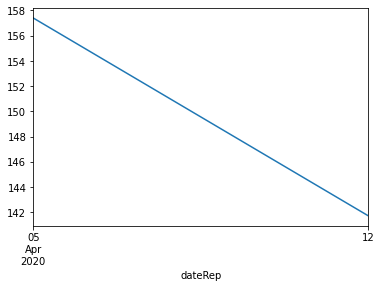

In [35]:
df_NL.Deaths['2020-04'].resample('W').mean().plot()

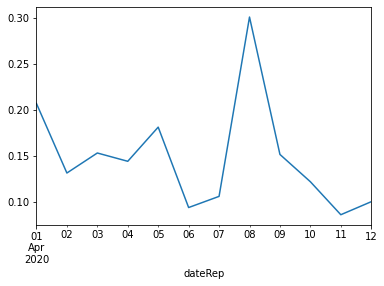

In [37]:
df_NL.Case_Fatality_Ratio['2020-04'].resample('D').mean().plot()

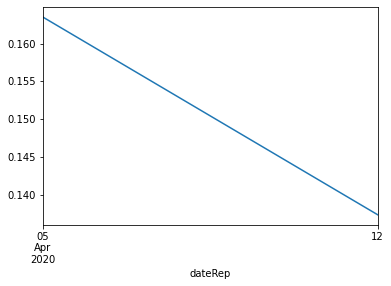

In [38]:
df_NL.Case_Fatality_Ratio['2020-04'].resample('W').mean().plot()